In [16]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
## parmaters 1
ConsiderTC1 = 1
ConsiderMB1 = 1
informal1 = 0.11
discount1 = 0.02
scenario1 = 'val'

## parmaters 2
ConsiderTC2 = 0
ConsiderMB2 = 1
informal2 = 0.11
discount2 = 0.02
scenario2 = 'val'


In [18]:
# only keep results
df_input = pd.read_csv('results/aggregate_results_imputed.csv')
# df_input = pd.read_csv('imputation/aggregate_results_imputed.csv')

df = df_input[(df_input['discount']==discount1)&
        (df_input['ConsiderTC']==ConsiderTC1)&
        (df_input['ConsiderMB']==ConsiderMB1)&
        (df_input['informal']==informal1)&
        (df_input['discount']==discount1)&
        (df_input['scenario']==scenario1)]
df = df.reset_index().drop(columns=['index'])
df = df[df['tax'] > 0]

df2 = df_input[(df_input['discount']==discount2)&
        (df_input['ConsiderTC']==ConsiderTC2)&
        (df_input['ConsiderMB']==ConsiderMB2)&
        (df_input['informal']==informal2)&
        (df_input['discount']==discount2)&
        (df_input['scenario']==scenario2)]
df2 = df2.reset_index().drop(columns=['index'])
df2 = df2[df2['tax'] > 0]

df = df.groupby('Country Code').sum().reset_index()
df2 = df2.groupby('Country Code').sum().reset_index()

countries_info = pd.read_csv('data/dl1_countrycodeorg_country_name.csv')
countries_info = countries_info[['Country Code', 'Region', 'Income group']]
codemap = countries_info.dropna()
df = df.merge(codemap, on='Country Code')
df2 = df2.merge(codemap, on='Country Code')

print(df.head())
print(len(df))

  Country Code  ConsiderTC  ConsiderMB  informal  discount     GDPloss  \
0          AFG           0           1      0.11      0.02   69.635660   
1          AGO           0           1      0.11      0.02   46.193146   
2          ALB           0           1      0.11      0.02   33.024464   
3          AND           0           1      0.11      0.02    4.721779   
4          ARE           0           1      0.11      0.02  853.329436   

        tax       pc_loss                      Region         Income group  
0  0.028615   1331.122178                  South Asia           Low income  
1  0.009327    881.046946          Sub-Saharan Africa  Lower middle income  
2  0.024745  12230.357197       Europe & Central Asia  Upper middle income  
3  0.028383  60857.047515       Europe & Central Asia          High income  
4  0.028471  81238.485460  Middle East & North Africa          High income  
199


In [19]:
df2

,Country Code,ConsiderTC,ConsiderMB,informal,discount,GDPloss,tax,pc_loss,Region,Income group
0,AFG,0,1,0.11,0.02,69.635660,0.028615,1331.122178,South Asia,Low income
1,AGO,0,1,0.11,0.02,46.193146,0.009327,881.046946,Sub-Saharan Africa,Lower middle income
2,ALB,0,1,0.11,0.02,33.024464,0.024745,12230.357197,Europe & Central Asia,Upper middle income
3,AND,0,1,0.11,0.02,4.721779,0.028383,60857.047515,Europe & Central Asia,High income
4,ARE,0,1,0.11,0.02,853.329436,0.028471,81238.485460,Middle East & North Africa,High income
...,...,...,...,...,...,...,...,...,...,...
194,WSM,0,1,0.11,0.02,1.568088,0.028388,6747.742382,East Asia & Pacific,Lower middle income
195,YEM,0,1,0.11,0.02,104.869820,0.028484,2662.969696,Middle East & North Africa,Low income
196,ZAF,0,1,0.11,0.02,371.516816,0.018872,5461.716799,Sub-Saharan Africa,Upper middle income
197,ZMB,0,1,0.11,0.02,18.189041,0.008294,655.110752,Sub-Saharan Africa,Lower middle income


In [20]:
data = df[['GDPloss','Country Code']].merge(df2[['GDPloss','Country Code']],on='Country Code')

In [21]:
data['TC'] = 1-data['GDPloss_y']/data['GDPloss_x']

In [22]:
data

,GDPloss_x,Country Code,GDPloss_y,TC
0,69.635660,AFG,69.635660,0.0
1,46.193146,AGO,46.193146,0.0
2,33.024464,ALB,33.024464,0.0
3,4.721779,AND,4.721779,0.0
4,853.329436,ARE,853.329436,0.0
...,...,...,...,...
194,1.568088,WSM,1.568088,0.0
195,104.869820,YEM,104.869820,0.0
196,371.516816,ZAF,371.516816,0.0
197,18.189041,ZMB,18.189041,0.0


In [23]:
data[data['Country Code']=='CHN']

,GDPloss_x,Country Code,GDPloss_y,TC
34,21557.54194,CHN,21557.54194,0.0


In [24]:
data[data['Country Code']=='USA']

,GDPloss_x,Country Code,GDPloss_y,TC
188,32218.448975,USA,32218.448975,0.0


In [25]:
data.sort_values('TC', ascending=False)

,GDPloss_x,Country Code,GDPloss_y,TC
0,69.635660,AFG,69.635660,0.0
125,49.671643,MUS,49.671643,0.0
127,1129.893792,MYS,1129.893792,0.0
128,6.260374,NAM,6.260374,0.0
129,14.957194,NER,14.957194,0.0
...,...,...,...,...
69,10.866178,GNQ,10.866178,0.0
70,298.948760,GRC,298.948760,0.0
71,2.238620,GRD,2.238620,0.0
72,3.424568,GRL,3.424568,0.0


In [26]:
ratio = (1-df2.groupby('Income group').sum()['GDPloss']/df.groupby('Income group').sum()['GDPloss']).to_frame('TC')
ratio = ratio.sort_values('TC')*100
ratio = ratio.reset_index()
ratio

,Income group,TC
0,High income,0.0
1,Low income,0.0
2,Lower middle income,0.0
3,Upper middle income,0.0


In [27]:
df2

,Country Code,ConsiderTC,ConsiderMB,informal,discount,GDPloss,tax,pc_loss,Region,Income group
0,AFG,0,1,0.11,0.02,69.635660,0.028615,1331.122178,South Asia,Low income
1,AGO,0,1,0.11,0.02,46.193146,0.009327,881.046946,Sub-Saharan Africa,Lower middle income
2,ALB,0,1,0.11,0.02,33.024464,0.024745,12230.357197,Europe & Central Asia,Upper middle income
3,AND,0,1,0.11,0.02,4.721779,0.028383,60857.047515,Europe & Central Asia,High income
4,ARE,0,1,0.11,0.02,853.329436,0.028471,81238.485460,Middle East & North Africa,High income
...,...,...,...,...,...,...,...,...,...,...
194,WSM,0,1,0.11,0.02,1.568088,0.028388,6747.742382,East Asia & Pacific,Lower middle income
195,YEM,0,1,0.11,0.02,104.869820,0.028484,2662.969696,Middle East & North Africa,Low income
196,ZAF,0,1,0.11,0.02,371.516816,0.018872,5461.716799,Sub-Saharan Africa,Upper middle income
197,ZMB,0,1,0.11,0.02,18.189041,0.008294,655.110752,Sub-Saharan Africa,Lower middle income


/home/caozhong/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


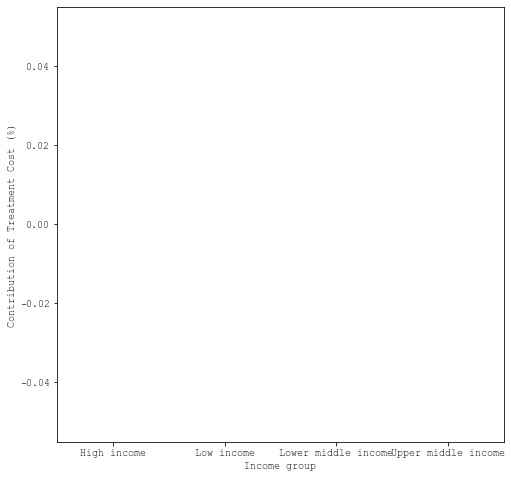

In [28]:
plt.rcParams['font.family']='Courier New, monospace'
fig, ax = plt.subplots(figsize=(8,8))  # create figure & 1 axis
ax = sns.barplot("Income group", y="TC", data=ratio, palette="Blues_d")
ax.set_ylabel('Contribution of Treatment Cost (%)')
plt.savefig('tables/figure_S4.pdf')

In [29]:
ratio = (1 - df2.groupby('Region').sum()['GDPloss']/df.groupby('Region').sum()['GDPloss']).to_frame('TC')
ratio = ratio.sort_values('TC')*100
ratio = ratio.reset_index()
ratio

,Region,TC
0,East Asia & Pacific,0.0
1,Europe & Central Asia,0.0
2,Latin America & Caribbean,0.0
3,Middle East & North Africa,0.0
4,North America,0.0
5,South Asia,0.0
6,Sub-Saharan Africa,0.0


/home/caozhong/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


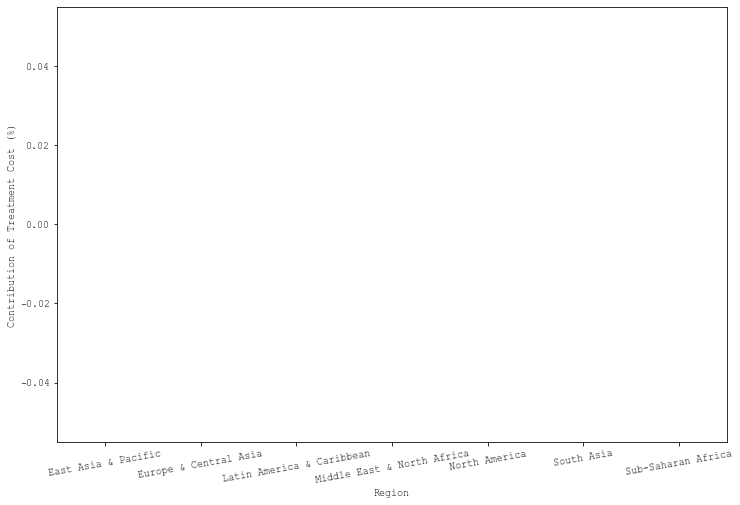

In [30]:
fig, ax = plt.subplots(figsize=(12,8))  # create figure & 1 axis
ax = sns.barplot("Region", y="TC", data=ratio, palette="Blues_d")
ax.set_ylabel('Contribution of Treatment Cost (%)')
plt.xticks(rotation=10)
plt.savefig('tables/figure_S5.pdf')